In [1]:
import numpy as np

import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import load_model
import tensorflow as tf 
import cv2
import imghdr
from matplotlib import pyplot as plt 
from skimage.io import imread
from skimage.transform import resize 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import tensorflow as tf 
import os
import numpy as np
from tensorflow.keras import datasets,layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from os import listdir,makedirs
from os.path import isfile,join

C:\Users\FHILMANBINHA\AppData\Local\Temp\ipykernel_16780\4098595716.py:10: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr
c:\ProgramData\Anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:

img_height, img_width = 256, 256

num_classes = 5  

batch_size = 32

epochs = 10

In [3]:
model = tf.keras.models.load_model('my_modelV7.keras')

In [4]:
data = tf.keras.utils.image_dataset_from_directory('augmented_data_4')
data = data.map(lambda x,y:(x/255, y ))


Found 8834 files belonging to 5 classes.


In [5]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.2)
size = train_size+val_size

In [6]:
train_datagen= data.take(train_size)
val_datagen = data.skip(train_size).take(val_size)

In [7]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= logdir)

In [9]:
history = model.fit(train_datagen, epochs = 3,validation_data= val_datagen, callbacks = [tensorboard_callback])


Epoch 1/3


221/221 ━━━━━━━━━━━━━━━━━━━━ 8647s 39s/step - accuracy: 0.2911 - loss: 1.5394 - val_accuracy: 0.4619 - val_loss: 1.2780
Epoch 2/3
221/221 ━━━━━━━━━━━━━━━━━━━━ 8547s 39s/step - accuracy: 0.5147 - loss: 1.1725 - val_accuracy: 0.5676 - val_loss: 1.0662
Epoch 3/3
221/221 ━━━━━━━━━━━━━━━━━━━━ 8563s 39s/step - accuracy: 0.6704 - loss: 0.8731 - val_accuracy: 0.7807 - val_loss: 0.5886


In [10]:
# Plot Training History

def plot_history(history):

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)

    plt.plot(history.history['accuracy'], label='Training Accuracy')

    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

    plt.title('Training and Validation Accuracy')

    plt.xlabel('Epoch')

    plt.ylabel('Accuracy')

    plt.legend()
 
    plt.subplot(1, 2, 2)

    plt.plot(history.history['loss'], label='Training Loss')

    plt.plot(history.history['val_loss'], label='Validation Loss')

    plt.title('Training and Validation Loss')

    plt.xlabel('Epoch')

    plt.ylabel('Loss')

    plt.legend()

    plt.tight_layout()

    plt.show()

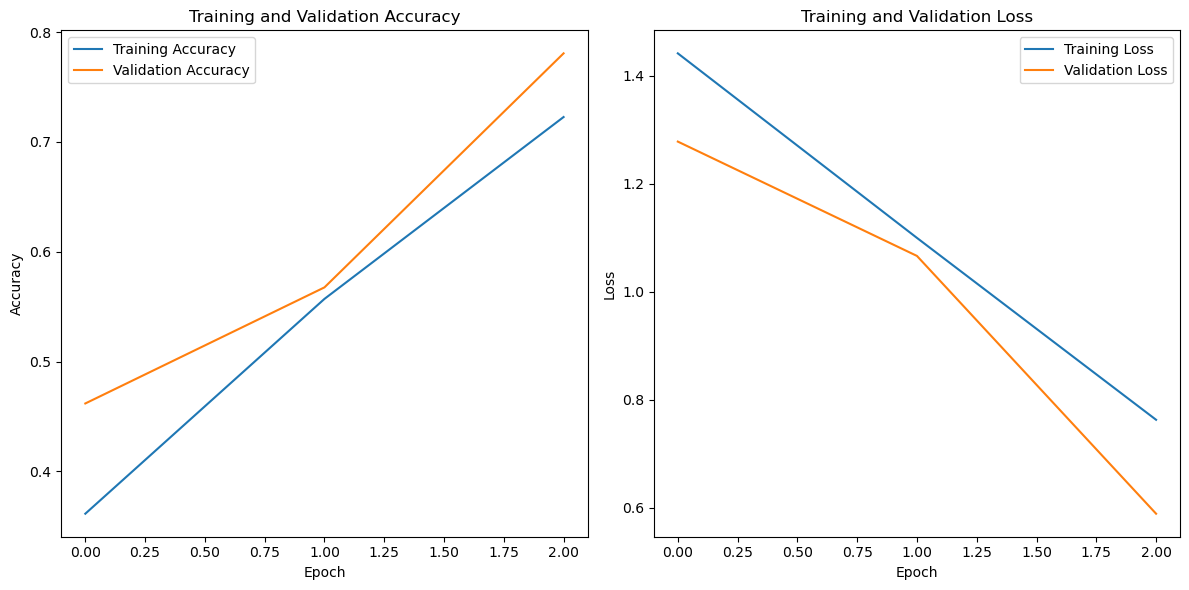

In [11]:
# Plot training history

plot_history(history)


In [12]:
model.save('my_modelV7_2.keras')

In [13]:
test_data = tf.keras.utils.image_dataset_from_directory('data_2')
test_data = test_data.map(lambda x,y:(x/255, y ))

Found 1752 files belonging to 5 classes.


In [14]:
model = tf.keras.models.load_model('my_modelV7_2.keras')

In [15]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy

In [16]:
pre = Precision()
re = Recall()
accuracy = SparseCategoricalAccuracy()

In [17]:
# Define the names of your classes
classes = ['UBFL','UBLD','UBNF', 'UCON','good']

# Iterate over your test data
for batch in test_data:
    X, y = batch  # Unpack the batch into inputs and true labels
    yhat = model.predict(X)  # Make predictions on the inputs
    predicted_classes = np.argmax(yhat, axis=1)  # Find the classes with the highest predicted probabilities

    # Flatten y and predicted_classes
    y_flat = tf.reshape(y, [-1])
    predicted_classes_flat = tf.reshape(predicted_classes, [-1])

    # Update the state of the metrics
    pre.update_state(y_flat, predicted_classes_flat)
    re.update_state(y_flat, predicted_classes_flat)
    accuracy.update_state(y_flat, predicted_classes_flat)


# Get the current result of the metrics
precision_result = pre.result().numpy()
recall_result = re.result().numpy()

accuracy_result = accuracy.result().numpy()
print(f'Precision: {precision_result}, Recall: {recall_result}')
print(f'Accuracy: {accuracy_result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━

In [13]:
model.save('my_modelV4_3.keras')